In [16]:
import pandas as pd
import numpy as np

ERROR! Session/line number was not unique in database. History logging moved to new session 179


In [10]:
DATA_URL = 'https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/telecom_churn.csv'
df = pd.read_csv(DATA_URL)

In [11]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [15]:
pd.crosstab(df["Churn"], df["International plan"], margins=True)

International plan,No,Yes,All
Churn,,,
False,2664,186,2850
True,346,137,483
All,3010,323,3333


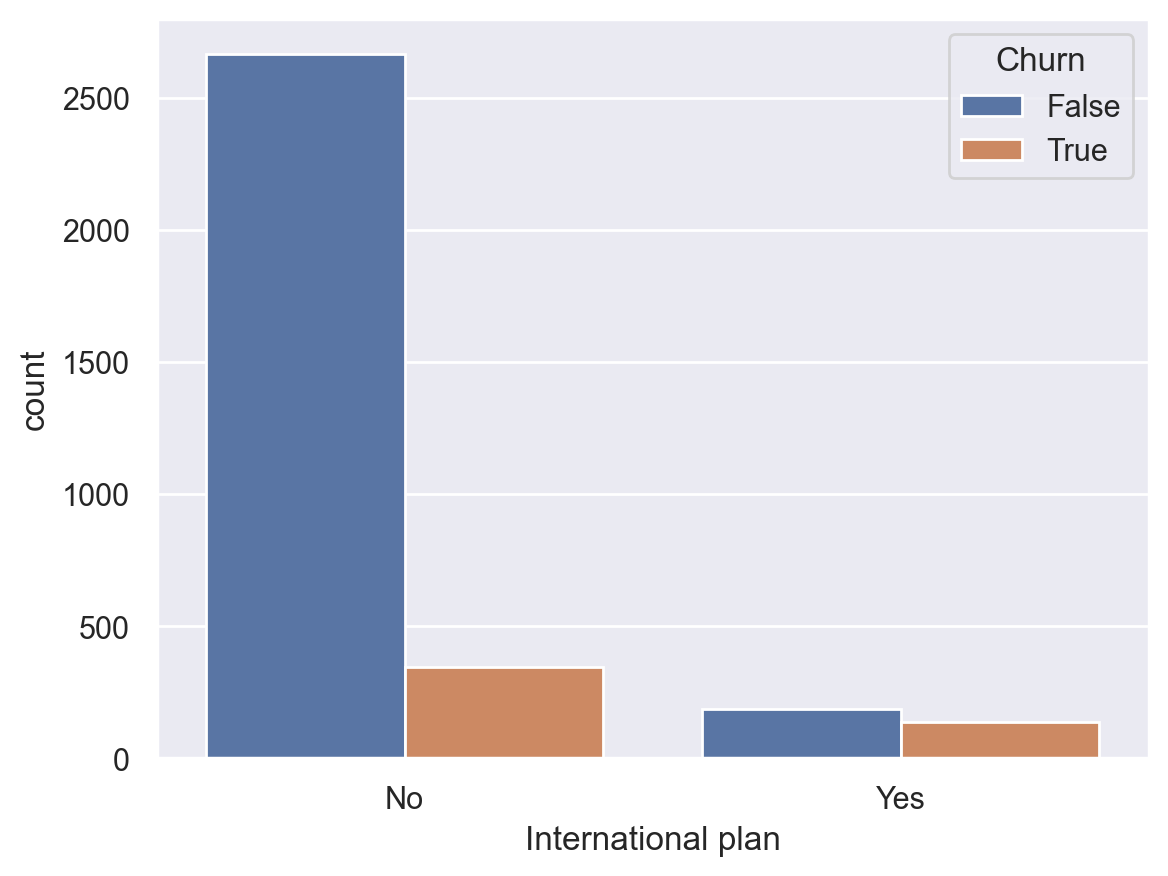

In [20]:
# some imports to set up plotting
import matplotlib.pyplot as plt

# !pip install seaborn
import seaborn as sns

# import some nice vis settings
sns.set_theme()
# Graphics in the Retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

sns.countplot(x="International plan", hue="Churn", data=df);

In [22]:
pd.crosstab(df["Churn"], df["Customer service calls"], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0,2850
True,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


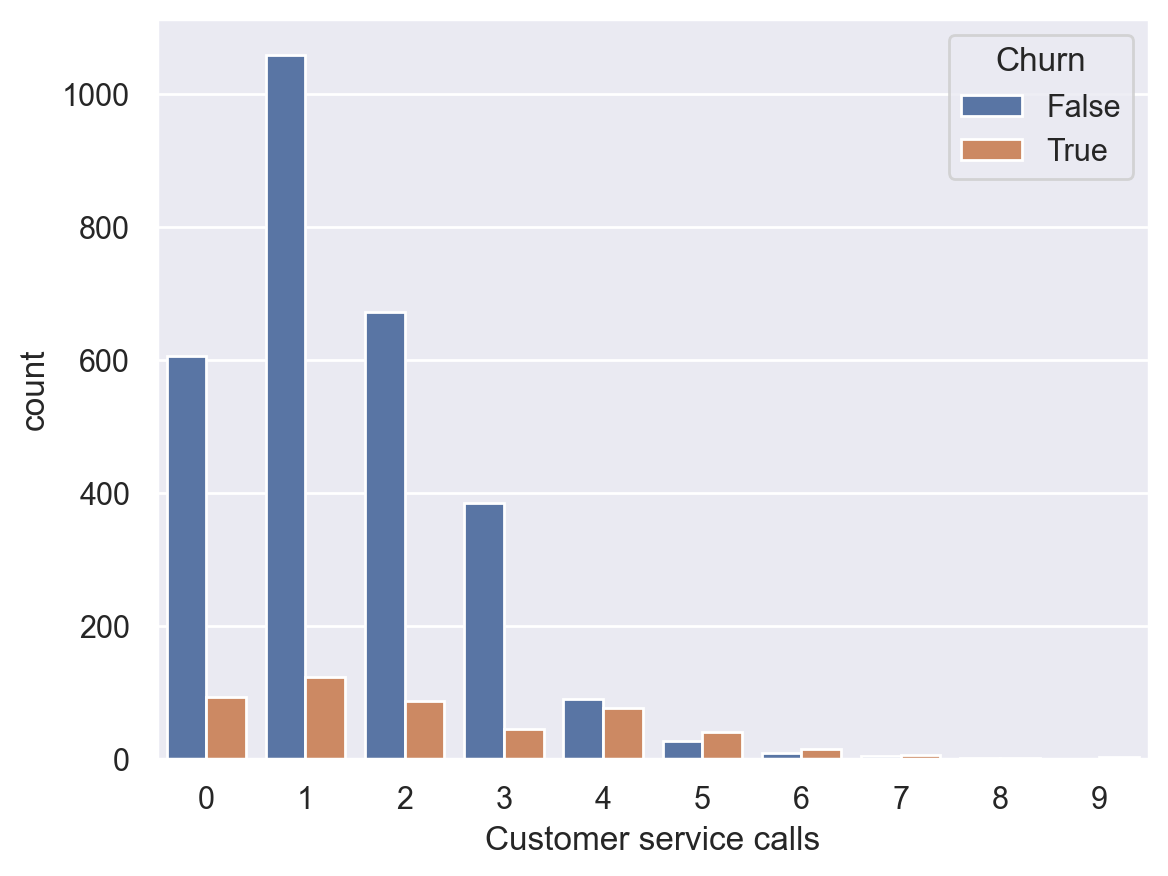

In [23]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);

In [24]:
df["Many_service_calls"] = (df["Customer service calls"] > 3).astype("int")

pd.crosstab(df["Many_service_calls"], df["Churn"], margins=True)

Churn,False,True,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


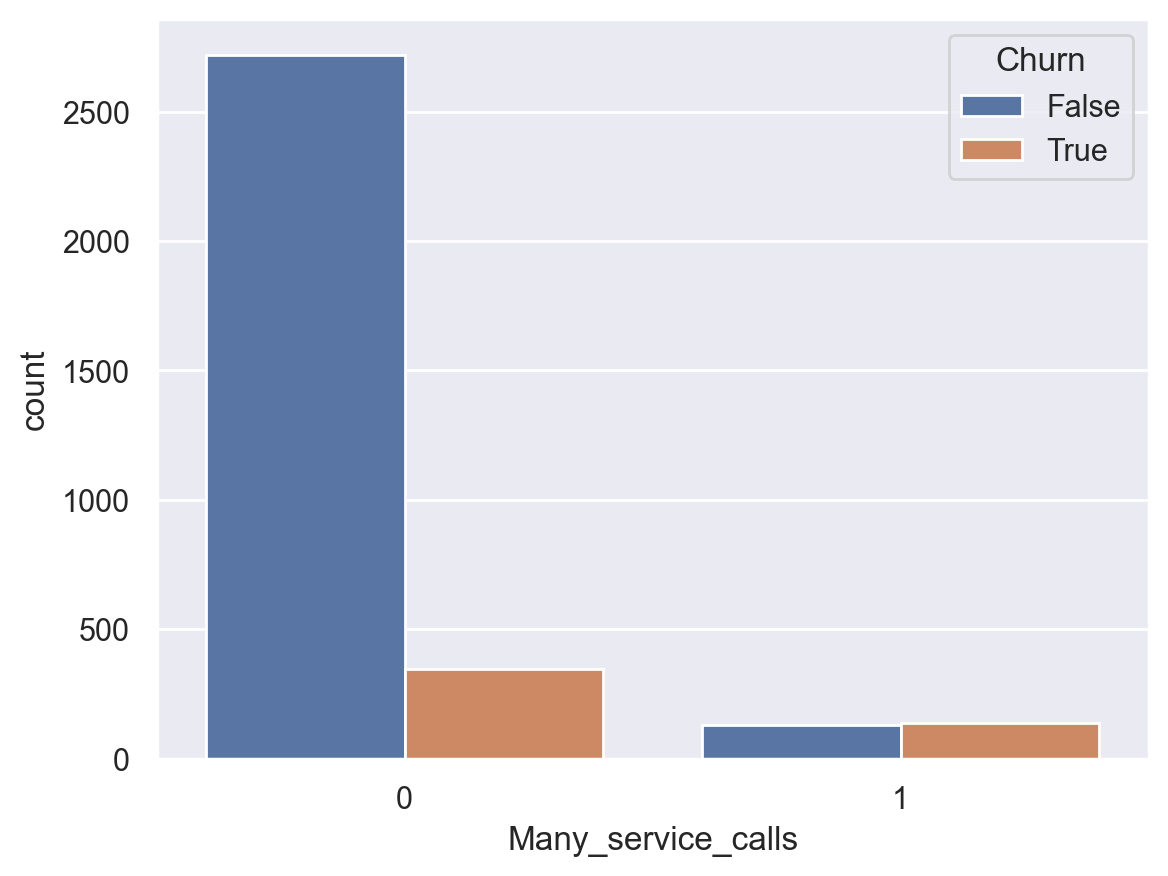

In [25]:
sns.countplot(x="Many_service_calls", hue="Churn", data=df);

In [27]:
pd.crosstab(df["Many_service_calls"] & df["International plan"].astype(bool), df["Churn"], margins=True)

Churn,False,True,All
row_0,,,
False,2721,345,3066
True,129,138,267
All,2850,483,3333


In [37]:
url = 'https://raw.githubusercontent.com/nikolaj278/ml_course_ai_ods/refs/heads/main/data/adult.data.csv'
!curl -O {url}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
0 3436k    0     0   342k      0  0:00:10  0:00:10 --:--:--  445k0:00:01  457k


In [38]:
adult_data = pd.read_csv('adult.data.csv')

In [69]:
adult_data.query("salary == '<=50K'").age.describe()

count    24720.000000
mean        36.783738
std         14.020088
min         17.000000
25%         25.000000
50%         34.000000
75%         46.000000
max         90.000000
Name: age, dtype: float64

In [104]:
# single men
adult_data[
    (adult_data["sex"] == "Male")
    & ~(adult_data["marital-status"].str.startswith("Married"))
]["salary"].value_counts(normalize=True)

salary
<=50K    0.915505
>50K     0.084495
Name: proportion, dtype: float64

In [101]:
adult_data.pivot_table(
    index='native-country', 
    values='hours-per-week', 
    columns='salary', 
    aggfunc='mean')\
          .query("index == 'Japan'")

salary,<=50K,>50K
native-country,,
Japan,41.0,47.958333
